In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import cv2
import os

In [2]:
for dirname, _, filenames in os.walk(r"/Users/Barbara/Desktop/Milestone 1"):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
labels = ['IDC', 'Normal']
size = 150
def training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                a = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resize = cv2.resize(a, (size, size))
                data.append([resize, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = training_data(r'/Users/Barbara/Desktop/Milestone 1/Train')

OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-0kq15xu_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-0kq15xu_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/Users/Barbara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [5]:
test = training_data(r'/Users/Barbara/Desktop/Milestone 1/Test')

OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-0kq15xu_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-0kq15xu_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/Users/Barbara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [6]:
validation = training_data(r'/Users/Barbara/Desktop/Milestone 1/Validation')

/Users/Barbara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


## Distribution between IDC and Normal Images

##### Training

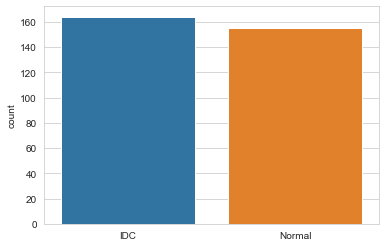

In [7]:
c = []
for i in train:
    if(i[1] == 0):
        c.append("IDC")
    else:
        c.append("Normal")
sns.set_style('whitegrid')
sns.countplot(c) 
plt.show()

##### Test

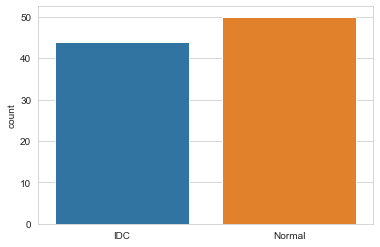

In [8]:
d = []
for i in test:
    if(i[1] == 0):
        d.append("IDC")
    else:
        d.append("Normal")
sns.set_style('whitegrid')
sns.countplot(d) 
plt.show()

##### Validation

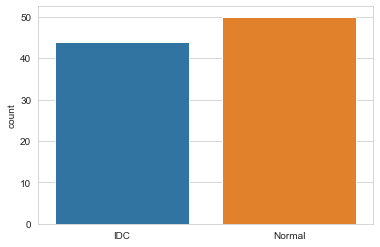

In [9]:
e = []
for i in test:
    if(i[1] == 0):
        e.append("IDC")
    else:
        e.append("Normal")
sns.set_style('whitegrid')
sns.countplot(e) 
plt.show()

### IDC vs Normal Image

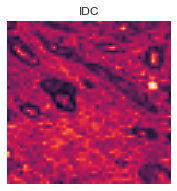

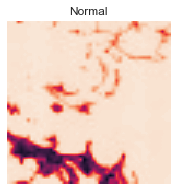

In [10]:
plt.figure(figsize = (3,3))
plt.imshow(train[0][0])
plt.axis('off')
plt.title(labels[train[0][1]])

plt.figure(figsize = (3,3))
plt.imshow(train[-1][0])
plt.axis('off')
plt.title(labels[train[-1][1]])

plt.show()

In [11]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)

for feature, label in validation:
    X.append(feature)
    y.append(label)

#### Resizing Images & Normalization

In [12]:
X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=32)

In [13]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

#### Data Augmentation

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range = 50, 
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip = True,
        vertical_flip=False) 


datagen.fit(X_train)

### Training

In [35]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 19, 19, 64)       

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [37]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 20) ,epochs = 10 , validation_data = datagen.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/10
6/6 [==============================] - 6s 771ms/step - loss: 0.8673 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.4818
Epoch 2/10
6/6 [==============================] - 4s 719ms/step - loss: 0.6930 - accuracy: 0.4727 - val_loss: 0.6965 - val_accuracy: 0.4818
Epoch 3/10
6/6 [==============================] - 4s 686ms/step - loss: 0.6925 - accuracy: 0.5455 - val_loss: 0.6924 - val_accuracy: 0.4818

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/10
6/6 [==============================] - 4s 638ms/step - loss: 0.6848 - accuracy: 0.5545 - val_loss: 0.6824 - val_accuracy: 0.7545
Epoch 5/10
6/6 [==============================] - 4s 656ms/step - loss: 0.6805 - accuracy: 0.5727 - val_loss: 0.6750 - val_accuracy: 0.6545
Epoch 6/10
6/6 [==============================] - 4s 656ms/step - loss: 0.6673 - accuracy: 0.6636 - val_loss: 0.6549 - val_accuracy: 0.8909
Epoch 7/10
6/6 [==============================] - 4s 668ms/step - loss: 0.6492 

In [38]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

7/7 [==============================] - 2s 190ms/step - loss: 0.5909 - accuracy: 0.8682
Loss of the model is -  0.5908502340316772
7/7 [==============================] - 1s 204ms/step - loss: 0.5909 - accuracy: 0.8682
Accuracy of the model is -  86.8181824684143 %


#### Model training overview

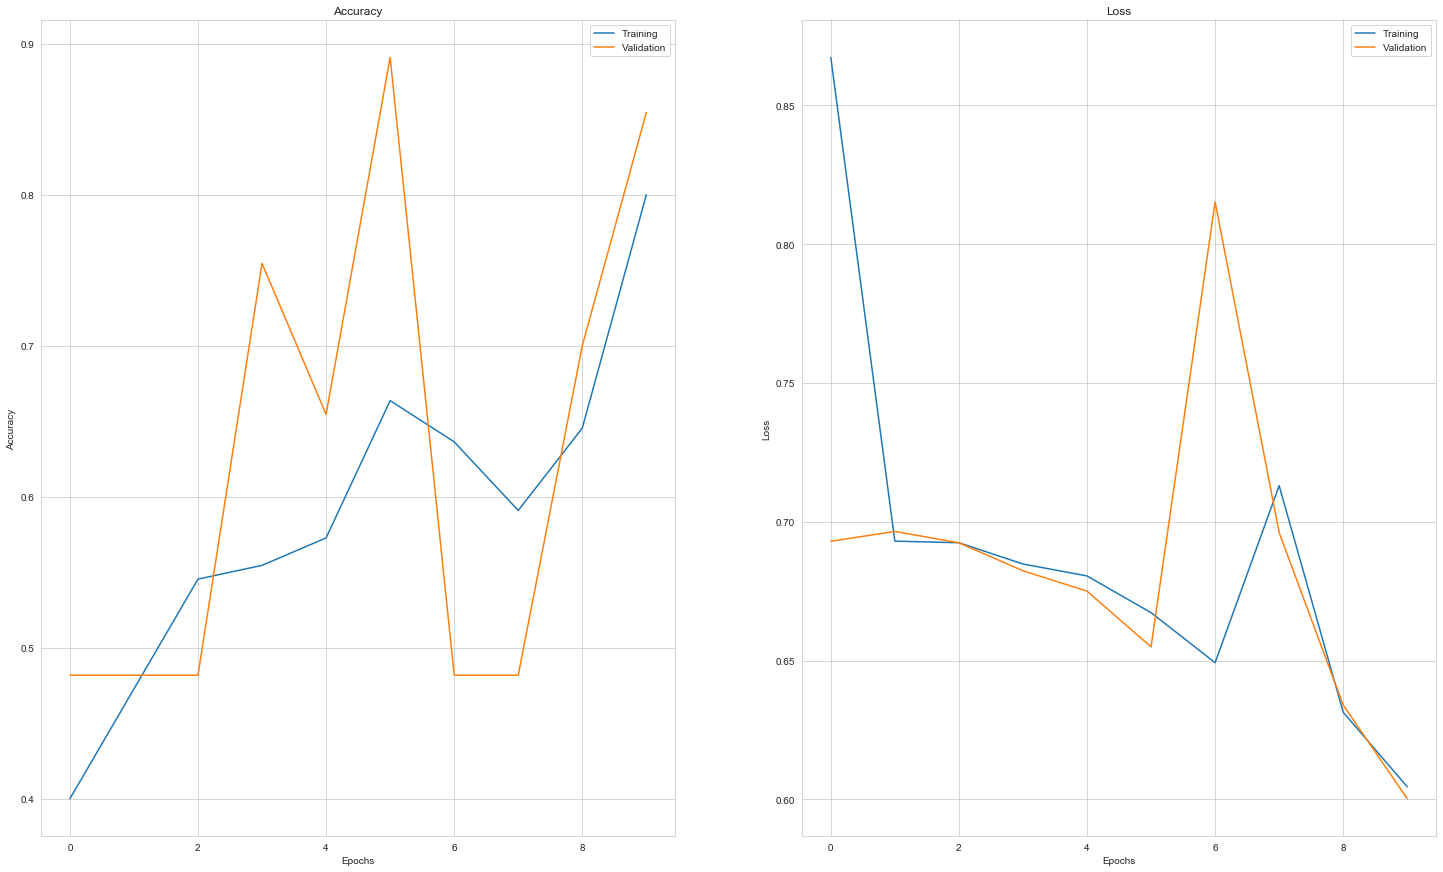

In [42]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']
fig.set_size_inches(25,15)

ax[0].plot(epochs , training_accuracy , label = 'Training')
ax[0].plot(epochs , validation_accuracy , label = 'Validation')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , training_loss , label = 'Training')
ax[1].plot(epochs , validation_loss , label = 'Validation')
ax[1].set_title('Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [43]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [49]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

In [50]:
print(classification_report(y_test, predictions, target_names = ['IDC','Normal']))

              precision    recall  f1-score   support

         IDC       0.83      0.92      0.87       110
      Normal       0.91      0.82      0.86       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



In [53]:
predictions_array = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for p in predictions:
    if p >= threshold:
        predictions_array.append(1)
    else:
        predictions_array.append(0)

#### Confusion Matrix

In [54]:
confusion_matrix = confusion_matrix(y_test,predictions)
confusion_matrix = pd.DataFrame(confusion_matrix , index = ['IDC','Norm'] , columns = ['IDC','Norm'])
confusion_matrix

,0,1
0,101,9
1,20,90


#### Correct Predicitons - IDC (0) vs Normal (1)

In [57]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

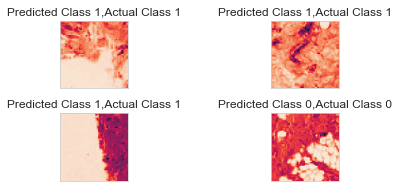

In [66]:
i = 0
for c in correct[:4]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150))
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

#### Incorrect Predicitons - IDC (0) vs Normal (1)

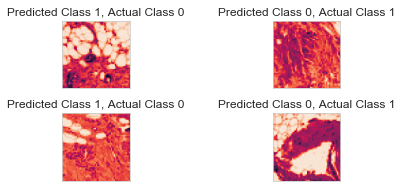

In [67]:
i = 0
for c in incorrect[:4]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150))
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Performance of Model

##### Green = correct 
##### Red = incorrect

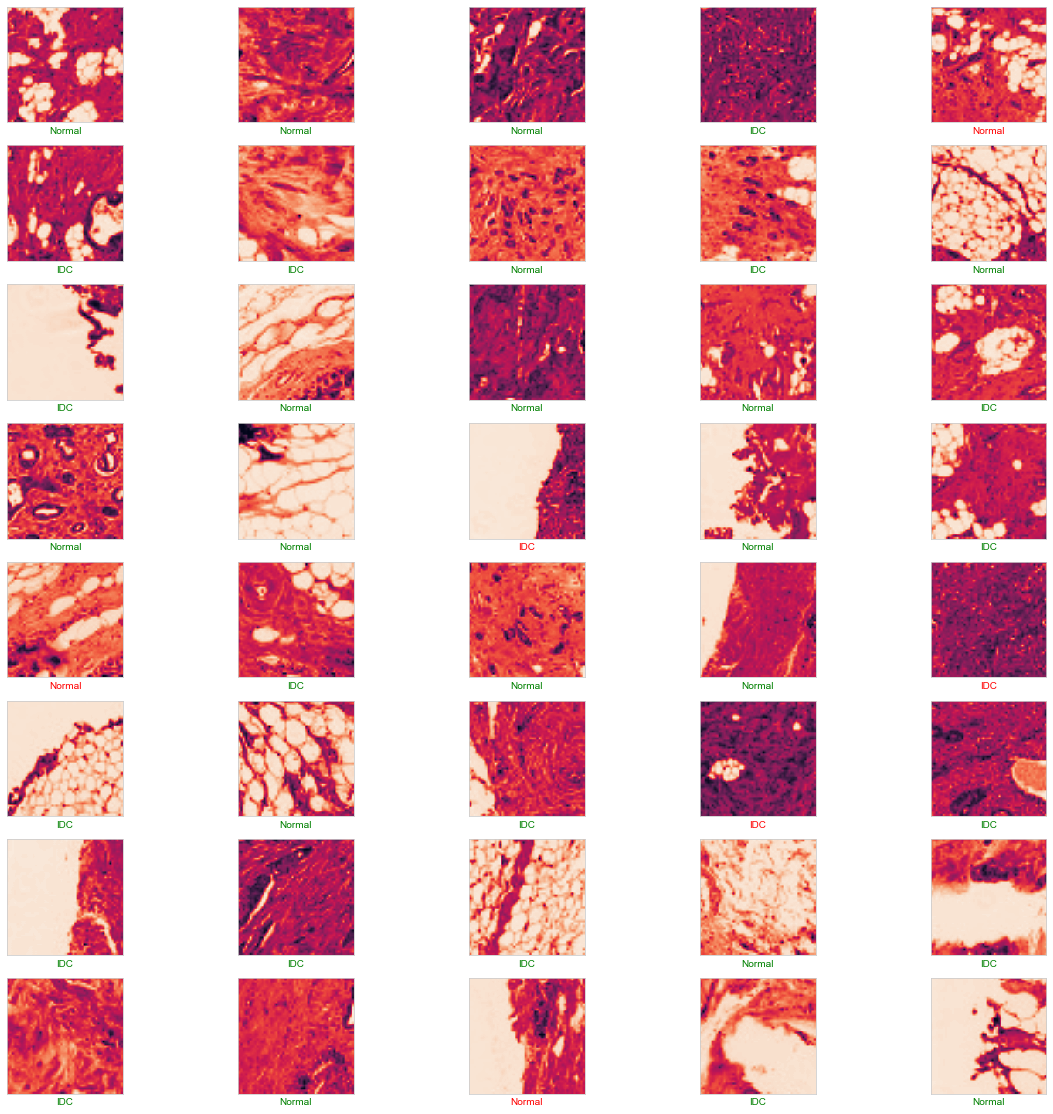

In [73]:
plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, size, size)[i])
    if(predictions_array[i]==y_test[i]):
        plt.xlabel(labels[predictions_array[i]], color='green')
    else:
        plt.xlabel(labels[predictions_array[i]], color='red')
plt.show()